In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
import time
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("dataset_N2N.csv", sep=",", header=0)
df.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,RVV38,RVV39,RVV40,RVV41,RVV42,RVV43,RVV44,RVV45,RVV46,RVV47
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,-2.401320e-109,-5.311691e-112,-1.346084e-114,-3.908330e-117,-1.300201e-119,-4.956191e-122,-2.164807e-124,-1.083521e-126,-6.214598e-129,-4.115686e-131
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,4.313327e+01,4.319762e+01,4.302709e+01,4.261090e+01,4.193997e+01,4.100697e+01,3.980402e+01,3.819891e+01,3.036801e+01,-1.093747e+03
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,2.222941e+02,2.225802e+02,2.216414e+02,2.194194e+02,2.158637e+02,2.109328e+02,2.045732e+02,1.958232e+02,1.487166e+02,-5.628267e+03
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,6.379328e+02,6.386028e+02,6.357109e+02,6.290790e+02,6.185514e+02,6.039950e+02,5.852063e+02,5.583745e+02,4.014412e+02,-1.612388e+04
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,8.370745e+03,8.365424e+03,8.308980e+03,8.198153e+03,8.029840e+03,7.800562e+03,7.495944e+03,6.918945e+03,3.138381e+03,-2.091199e+05


In [32]:
X = df.iloc[:,0:54].values    # x_s, time_s, Temp, ni_n, na_n, rho, v, p, E, H
y = df.iloc[:,54:55].values   # rhs[0:50]

In [33]:
y.shape

(1936, 1)

In [34]:
# feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [35]:
feature_names = ["x_s","time_s", "Temp"] + [f"X{i}" for i in range(1, 48)] + ["rho", "v","p"] + [f"RDm{i}" for i in range(1, 47)] + [f"RDa{i}" for i in range(1, 47)] + [f"RVTm{i}" for i in range(1, 47)] + [f"RVTa{i}" for i in range(1, 47)] + [f"RVV{i}" for i in range(1, 47)]

In [36]:
list1 = list(feature_names)


In [37]:
type(list1)

list

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=69)

In [39]:
print("x=",x_train.shape)
print("y=",y_train.shape)

x= (1452, 54)
y= (1452, 1)


In [40]:
est = ExtraTreesRegressor(n_estimators=50)
est = est.fit(x_train,y_train.ravel())

In [41]:
print(est.feature_importances_)

[2.15958193e-03 1.71491221e-03 8.17112773e-03 6.45379845e-02
 1.46028623e-02 1.28157373e-01 1.65568729e-01 1.40102309e-01
 5.48141141e-02 5.43825073e-02 1.81340411e-02 1.83023062e-02
 3.53263808e-02 3.51826083e-02 5.67087151e-04 2.45750134e-04
 3.54709280e-02 2.09624394e-04 1.73601025e-02 1.53048350e-03
 1.06621372e-03 1.49655070e-04 1.18778470e-04 6.33452528e-05
 9.55010910e-04 1.41664744e-03 1.93329154e-03 1.27717900e-04
 3.71649219e-03 5.91724010e-05 8.33193774e-05 7.83550141e-05
 1.39047373e-04 1.11168316e-03 2.12543776e-03 1.81935508e-05
 7.68730243e-06 1.14029630e-03 1.21873778e-05 3.63272109e-05
 1.85164653e-05 1.71773522e-03 1.82760823e-03 1.49774644e-03
 1.34166277e-06 4.15524454e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.57254697e-03 3.08870919e-02
 1.13355596e-01 2.90669006e-02]


In [42]:
model = SelectFromModel(est, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(1936, 12)


In [43]:

start_time = time.time()
importances = est.feature_importances_
# Feature importance based on mean decrease in impurity
std = np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [44]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


In [49]:
v = list1[0:54:1]

In [50]:
#v

In [51]:
forest_importances = pd.Series(importances, index=v)

In [52]:
df3=pd.DataFrame(forest_importances, columns=['SelectFromModel'])
print(df3)


        SelectFromModel
x_s            0.002160
time_s         0.001715
Temp           0.008171
X1             0.064538
X2             0.014603
X3             0.128157
X4             0.165569
X5             0.140102
X6             0.054814
X7             0.054383
X8             0.018134
X9             0.018302
X10            0.035326
X11            0.035183
X12            0.000567
X13            0.000246
X14            0.035471
X15            0.000210
X16            0.017360
X17            0.001530
X18            0.001066
X19            0.000150
X20            0.000119
X21            0.000063
X22            0.000955
X23            0.001417
X24            0.001933
X25            0.000128
X26            0.003716
X27            0.000059
X28            0.000083
X29            0.000078
X30            0.000139
X31            0.001112
X32            0.002125
X33            0.000018
X34            0.000008
X35            0.001140
X36            0.000012
X37            0.000036
X38            0

In [53]:
df3

,SelectFromModel
x_s,0.002160
time_s,0.001715
Temp,0.008171
X1,0.064538
X2,0.014603
X3,0.128157
X4,0.165569
X5,0.140102
X6,0.054814
X7,0.054383


In [30]:
SelectFromModel_N2N= df3.loc[:].reset_index()
SelectFromModel_N2N.to_csv('SelectFromModel.csv', index=False)

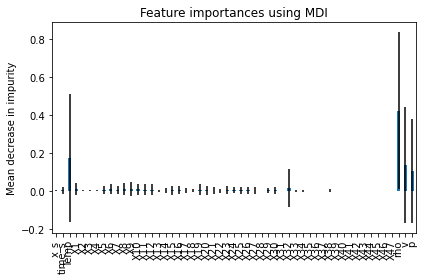

In [24]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [16]:
importances


array([1.70862100e-03, 3.89154590e-03, 1.73702465e-01, 1.02206568e-02,
       1.44805368e-03, 1.16094488e-03, 1.18437104e-03, 5.11004264e-03,
       9.75461200e-03, 6.10576965e-03, 9.78013869e-03, 1.12096829e-02,
       9.25861397e-03, 7.73141053e-03, 7.96246398e-03, 9.04900789e-04,
       2.23940145e-03, 4.97080627e-03, 3.49648509e-03, 2.46952999e-03,
       1.62304047e-03, 7.48443853e-03, 4.01874568e-03, 2.69744162e-03,
       1.64200150e-03, 3.98987269e-03, 3.12907282e-03, 3.29077922e-03,
       2.78207269e-03, 2.72099785e-03, 2.73829104e-04, 2.77518346e-03,
       3.32684942e-03, 1.81213173e-05, 1.48713670e-02, 5.90861885e-04,
       9.00808266e-04, 3.51830277e-04, 1.50198510e-04, 1.37070137e-04,
       1.29447153e-03, 1.91138783e-04, 8.75553917e-05, 1.62697038e-04,
       4.88343656e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.23884479e-01, 1.37036220e-01,
       1.05769996e-01])

In [79]:
# Важность функции перестановки-это метод проверки модели, который может быть использован для любой подходящей оценки, когда данные табличные. Это особенно полезно для нелинейных или непрозрачных оценок. Важность функции перестановки определяется как уменьшение оценки модели при случайном перемешивании одного значения функции 1. Эта процедура нарушает связь между функцией и целью, таким образом, падение оценки модели указывает на то, насколько модель зависит от функции. Этот метод выигрывает от того, что он не зависит от модели и может быть рассчитан много раз с различными перестановками функции.

In [81]:
start_time = time.time()
result = permutation_importance(
    est, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 3.374 seconds


In [83]:
forest_importances = pd.Series(result.importances_mean, index=v)


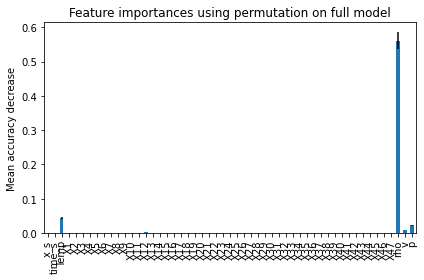

In [84]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()